# Implementing Search Algorithms Lab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//ericmanley/ai_map_environments/blob/main/notebooks/implementing_search_lab.ipynb)

This notebook uses a new class in our `mapbots` module called `FullyObservableStreetSweeperWorld` which is a subclass of the StreetSweeperWorld we worked with that reveals more details of the environment that the bot can use to make decisions. 

If you are interested, you can see the details of how the code works here: https://github.com/ericmanley/ai_map_environments/blob/main/mapbots/street_sweeper.py

You do need to install a new version of the module. You can do probably do that with something like this (which should upgrade if you ran it on your own computer - or it should always work in Colab). 

In [ ]:
import sys

!{sys.executable} -m pip install mapbots

## Getting Started

We create the bot/environment in the same way, except that the name of the class is `FullyObservableStreetSweeperWorld`

Setting up the map. This may take a few minutes.


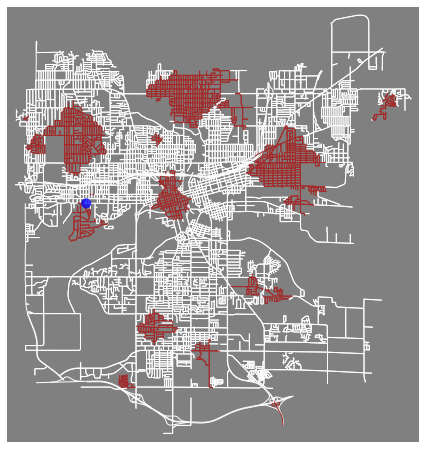

In [2]:
from mapbots import FullyObservableStreetSweeperWorld

planning_bot = FullyObservableStreetSweeperWorld(place="Des Moines, Iowa, USA",map_number=11)
planning_bot.display_map()

## Finding the dirty regions

This version has a `get_dirty_regions()` method which will give a list of all those areas that are dirty. You can see that it returns a list which shows the `location_id` (i.e., the intersection) of the center of each dirty region and a `size` which tells you roughly how big of a dirty area that is.

In [3]:
dirty_regions = planning_bot.get_dirty_regions()
dirty_regions

[{'center': 160942532, 'size': 1755},
 {'center': 9563750446, 'size': 954},
 {'center': 160911793, 'size': 1041},
 {'center': 160954807, 'size': 389},
 {'center': 160833851, 'size': 1647},
 {'center': 160929003, 'size': 975},
 {'center': 160975174, 'size': 1258},
 {'center': 160834150, 'size': 193},
 {'center': 160910349, 'size': 622},
 {'center': 160820745, 'size': 186},
 {'center': 160936119, 'size': 1659},
 {'center': 1118321946, 'size': 1300},
 {'center': 160772452, 'size': 1220},
 {'center': 160895353, 'size': 1976},
 {'center': 160911856, 'size': 1340},
 {'center': 4577704044, 'size': 1261},
 {'center': 160994408, 'size': 323},
 {'center': 160971777, 'size': 31},
 {'center': 160934142, 'size': 130},
 {'center': 160790878, 'size': 74},
 {'center': 160842204, 'size': 1802},
 {'center': 160855392, 'size': 1229},
 {'center': 160759140, 'size': 1594},
 {'center': 160914894, 'size': 669},
 {'center': 160908584, 'size': 1211},
 {'center': 160844037, 'size': 1064}]

Because this is a list of dictionaries, if you wanted to isolate one of those center location_ids, you could do it with an index and then selecting the `'center'` key like this.

In [4]:
destination = dirty_regions[0]['center']
print(destination)

160942532


## Getting info about far away locations

Previously, we could only see the information about the current location and surrounding streets like this

In [5]:
planning_bot.get_current_location()

{'y': 41.5845132,
 'x': -93.6712223,
 'street_count': 3,
 'location_id': 160854104}

In [6]:
planning_bot.scan_next_streets()

[{'start': {'y': 41.5845132,
   'x': -93.6712223,
   'street_count': 3,
   'location_id': 160854104},
  'end': {'y': 41.5863641,
   'x': -93.6712366,
   'street_count': 4,
   'location_id': 160897468},
  'street_data': {'osmid': 16007801,
   'name': '40th Street',
   'highway': 'residential',
   'oneway': False,
   'reversed': False,
   'length': 205.84799999999998,
   'geometry': <LINESTRING (-93.671 41.585, -93.671 41.585, -93.671 41.585, -93.671 41.585,...>,
   'speed_kph': 41.2,
   'travel_time': 18.0,
   'cleanliness': 'clean'}},
 {'start': {'y': 41.5845132,
   'x': -93.6712223,
   'street_count': 3,
   'location_id': 160854104},
  'end': {'y': 41.5845276,
   'x': -93.6728465,
   'street_count': 3,
   'location_id': 160854110},
  'street_data': {'osmid': 46112587,
   'name': 'Grand Avenue',
   'highway': 'secondary',
   'oneway': False,
   'reversed': False,
   'length': 135.125,
   'geometry': <LINESTRING (-93.671 41.585, -93.672 41.585, -93.672 41.585, -93.672 41.585,...>,
   's

But now you can get this information about any node - even one that is far away. Here's how you can do it about the `destination` note from above. 

We call the `get_location_info` method and pass the location_id of the far away node as an argument.

In [7]:
planning_bot.get_location_info( destination )

{'y': 41.571402, 'x': -93.675898, 'street_count': 3, 'location_id': 160942532}

We can also pass a location_id to `get_outgoing_streets_from_location` to see what streets you could access from that location if you were there. (note, there is also a `get_incoming_streets_from_location` method, but you may not need that)

In [8]:
planning_bot.get_outgoing_streets_from_location( destination )

[{'start': {'y': 41.571402,
   'x': -93.675898,
   'street_count': 3,
   'location_id': 160942532},
  'end': {'y': 41.573359,
   'x': -93.675732,
   'street_count': 3,
   'location_id': 160942549},
  'street_data': {'osmid': 16011780,
   'name': 'Glenview Drive',
   'highway': 'residential',
   'oneway': False,
   'reversed': False,
   'length': 218.31099999999998,
   'geometry': <LINESTRING (-93.676 41.571, -93.676 41.572, -93.676 41.572, -93.676 41.572,...>,
   'speed_kph': 41.2,
   'travel_time': 19.1,
   'cleanliness': 'dirty'}},
 {'start': {'y': 41.571402,
   'x': -93.675898,
   'street_count': 3,
   'location_id': 160942532},
  'end': {'y': 41.5709175,
   'x': -93.6743343,
   'street_count': 3,
   'location_id': 160942586},
  'street_data': {'osmid': 16011783,
   'name': 'Glenview Drive',
   'highway': 'residential',
   'oneway': False,
   'reversed': True,
   'length': 153.21800000000002,
   'geometry': <LINESTRING (-93.676 41.571, -93.676 41.571, -93.675 41.571, -93.675 41.571,

## Demo: Coding up BFS

In class, we're going to walk through writing the code to implement breadth-first search for this problem.

To start with, we're including the book's description of the algorithm

In [9]:
# function Tree-Search( problem, strategy) returns a solution, or failure initialize the frontier using the initial state of problem
#   initialize the frontier using the initial state of problem
#   loop do
#     if the frontier is empty then return failure
#     choose a leaf node from the frontier according to strategy
#     if the node contains a goal state then return the corresponding solution
#     else expand the node and add the resulting nodes to the frontier
#   end el

## Solution

In case you don't get it all down in class, here is a solution I worked up ahead of time.

In [10]:
# We need a way to represent the nodes in the tree
# I'm trying to keep this one simple, but you could
# use better object-oriented programming practices
class SSWSearchNode:
    
    def __init__(self,location,parent=None):
        
        self.location = location #this is the state
        
        self.parent = parent #keeps track of the node that leads to this one
        self.children = [] #a list of all the nodes that appear below this when expanded
        
    # we'll add all the new nodes using this function when we "expand" this node    
    def add_child(self,new_child_node):
        self.children.append(new_child_node)   

In [11]:
# Solution version 1
# this keeps track of the frontier using a regular list
# if deques are new to you, you may find this easier to follow
def bfs(bot,destination):
    # initialize the frontier using the initial state of problem
    initial_location = bot.get_current_location()
    root_node = SSWSearchNode(initial_location["location_id"])
    frontier = [root_node]
    while True:
        # if the frontier is empty then return failure
        if frontier == []:
            return None #failure
        
        # choose a leaf node from the frontier according to strategy
        chosen_leaf = frontier.pop(0) #take the thing off the front of the "queue"
        
        # if the node contains a goal state then return the corresponding solution
        if chosen_leaf.location == destination: #destination is the goal
            # we're looping through the tree and creating a list from the locations in each node
            route = []
            curr_node = chosen_leaf
            while curr_node.parent != None:
                route.insert(0,curr_node.location)
                curr_node = curr_node.parent
            return route
        # else expand the node and add the resulting nodes to the frontier
        else:
            for street in bot.get_outgoing_streets_from_location( chosen_leaf.location ):
                new_node = SSWSearchNode(street["end"]["location_id"],parent=chosen_leaf)
                chosen_leaf.add_child(new_node)
                frontier.append(new_node)

In [12]:
# Solution version 2
# this uses a deque because it has fast access to both the left and right
# since we are implementing the frontier as a queue, it should be much faster

from collections import deque


def bfs(bot,destination):
    # initialize the frontier using the initial state of problem
    initial_location = bot.get_current_location()
    root_node = SSWSearchNode(initial_location["location_id"])
    frontier = deque()
    frontier.append(root_node)
    while True:
        # if the frontier is empty then return failure
        if frontier == []:
            return None #failure
        
        # choose a leaf node from the frontier according to strategy
        chosen_leaf = frontier.popleft() #take the thing off the front of the "queue"
        
        # if the node contains a goal state then return the corresponding solution
        if chosen_leaf.location == destination: #destination is the goal
            # we're looping through the tree and creating a list from the locations in each node
            route = deque()
            curr_node = chosen_leaf
            while curr_node.parent != None:
                route.appendleft(curr_node.location)
                curr_node = curr_node.parent
            return route
        # else expand the node and add the resulting nodes to the frontier
        else:
            for street in bot.get_outgoing_streets_from_location( chosen_leaf.location ):
                new_node = SSWSearchNode(street["end"]["location_id"],parent=chosen_leaf)
                chosen_leaf.add_child(new_node)
                frontier.append(new_node)

We can display the locations along the route we calculated:

In [13]:
dest1 = dirty_regions[0]['center']
calculated_route = bfs(planning_bot,dest1)
calculated_route

deque([160854110,
       160817632,
       160732021,
       160732019,
       1114261314,
       160956859,
       160956861,
       160956872,
       160942532])

But remember, this is just a plan - we haven't actually moved yet. Let's do it!

In [14]:
planning_bot.get_current_location()

{'y': 41.5845132,
 'x': -93.6712223,
 'street_count': 3,
 'location_id': 160854104}

In [15]:
for loc in calculated_route:
    planning_bot.move_to(loc)

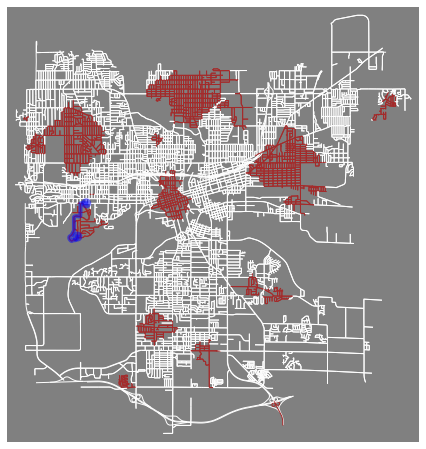

In [16]:
planning_bot.display_map()

## Exercise

Try finding a route to another destination from the `dirty_regions` list. You'll see that it takes a really really really long time. Why do you think that is? Discuss with group.

## Exercise

Since we have a problem with costs associated with each action (e.g., Travel Time), we should try Uniform Cost Search. What changes do we need to make to the `bfs` code to make it work for Uniform Cost Search? Write down some ideas, and then when everyone in your group is satisfied with them, take a stab at making changes to the code. 

Eventually this will be part of the next project. 